In [19]:
# Install required libraries
#!pip install -U scikit-learn matplotlib pandas
#!pip install -U numpy seaborn
#!pip install -U openpyxl

In [20]:
#!pip freeze

In [1]:
# Import essential libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Set random seed
np.random.seed(10)

# 1. Loading Data

In [3]:
# Load Excel (xlsx) file
df = pd.read_excel("results.xlsx")
df = df.drop(columns="ID", axis=0)
df

,Bone Quality,diameter,length,ratio,prosthesis,antagonist,position,arch,habits,bone loss,aging,abutment angulation,vertical,horizontal,shape,surface,retention,failure
0,3,1,2,2.0,1,4,2,1,NaN,2,2,0,2,1.0,1,1,1,0
1,4,1,2,2.0,1,4,2,1,NaN,2,2,0,2,1.0,1,1,1,0
2,2,1,1,1.0,1,4,2,2,NaN,1,2,0,1,1.0,1,1,2,0
3,2,1,2,2.0,1,4,2,2,NaN,1,2,0,2,1.0,1,1,1,0
4,2,1,1,1.0,1,2,2,2,0.0,1,2,0,1,1.0,1,1,1,0
5,2,1,1,1.0,1,2,2,2,0.0,1,2,0,1,1.0,1,1,1,0
6,2,1,1,1.0,1,2,2,2,0.0,1,1,0,1,1.0,1,1,1,0
7,3,2,1,1.0,1,2,1,1,1.0,1,2,1,1,2.0,1,1,1,0
8,3,2,1,1.0,1,2,1,1,1.0,1,2,1,1,2.0,1,1,1,0
9,2,2,1,1.0,1,2,1,1,1.0,1,2,1,1,2.0,1,1,1,0


In [24]:
#cols= df.columns.to_list()
#df[cols]=df[cols].astype('category')

In [25]:
df.shape

(50, 18)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bone Quality         50 non-null     int64  
 1   diameter             50 non-null     int64  
 2   length               50 non-null     int64  
 3   ratio                48 non-null     float64
 4   prosthesis           50 non-null     int64  
 5   antagonist           50 non-null     int64  
 6   position             50 non-null     int64  
 7   arch                 50 non-null     int64  
 8   habits               46 non-null     float64
 9   bone loss            50 non-null     int64  
 10  aging                50 non-null     int64  
 11  abutment angulation  50 non-null     int64  
 12  vertical             50 non-null     int64  
 13  horizontal           48 non-null     float64
 14  shape                50 non-null     int64  
 15  surface              50 non-null     int64

# 2. Exploratory Data Analysis

Text(0.5, 1.0, 'Failure = 1, Success = 0')

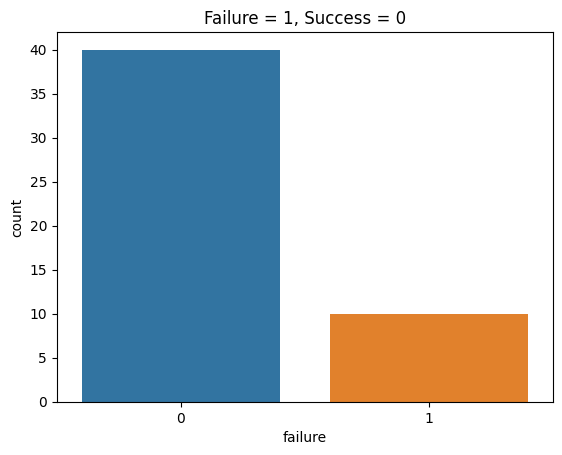

In [27]:
sns.countplot(x=df['failure']).set_title("Failure = 1, Success = 0")

The bar chart reveals that this study contains imbalanced data. 
- Most of the data points are "success" class. Thus, need to balance the data. Specifically, oversampling the minority class

Duplicating examples in the minority class doesn't add any new information to the model.
- Instead, new wxamples can be synthesized from the existing examples

# 3. Balancing Data - Data Augmentation

This analysis will use SMOTE (Synthetic Minority Oversampling Technique) for data augmentation (synthesize new examples) on the "success" class.

This technique was described by [Nitesh Chawla](https://www3.nd.edu/~nchawla/), et al. in their 2002 paper named for the technique titled “[SMOTE: Synthetic Minority Over-sampling Technique.](https://arxiv.org/abs/1106.1813)”

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

A general downside of the approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.

In [28]:
#!pip install imbalanced-learn

In [4]:
import imblearn
print(imblearn.__version__)

0.10.1


In [5]:
# Feature columns
X = df.drop(columns="failure", axis=0)

# Target column
y = df["failure"]

In [6]:
X.head()

,Bone Quality,diameter,length,ratio,prosthesis,antagonist,position,arch,habits,bone loss,aging,abutment angulation,vertical,horizontal,shape,surface,retention
0,3,1,2,2.0,1,4,2,1,NaN,2,2,0,2,1.0,1,1,1
1,4,1,2,2.0,1,4,2,1,NaN,2,2,0,2,1.0,1,1,1
2,2,1,1,1.0,1,4,2,2,NaN,1,2,0,1,1.0,1,1,2
3,2,1,2,2.0,1,4,2,2,NaN,1,2,0,2,1.0,1,1,1
4,2,1,1,1.0,1,2,2,2,0.0,1,2,0,1,1.0,1,1,1


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: failure, dtype: int64

In [12]:
# summarize class distribution
from collections import Counter

counter = Counter(y)
print(counter)

Counter({0: 40, 1: 10})


In [34]:
counter.items()

dict_items([(0, 40), (1, 10)])

0 = Success, 1 = Failure

## 3.1 Dealing with Missing Values

Using univariate feature imputation, missing values are replaced with statistics (most frequent, in this case)

In [8]:
from numpy import isnan
# print total missing
print('Missing: %d' % sum(isnan(X).sum()))

Missing: 8


In [9]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
Xtrans = imp.fit_transform(X)
print('Missing: %d' % sum(isnan(Xtrans).flatten()))
print(Xtrans)


Missing: 0
[[3. 1. 2. 2. 1. 4. 2. 1. 0. 2. 2. 0. 2. 1. 1. 1. 1.]
 [4. 1. 2. 2. 1. 4. 2. 1. 0. 2. 2. 0. 2. 1. 1. 1. 1.]
 [2. 1. 1. 1. 1. 4. 2. 2. 0. 1. 2. 0. 1. 1. 1. 1. 2.]
 [2. 1. 2. 2. 1. 4. 2. 2. 0. 1. 2. 0. 2. 1. 1. 1. 1.]
 [2. 1. 1. 1. 1. 2. 2. 2. 0. 1. 2. 0. 1. 1. 1. 1. 1.]
 [2. 1. 1. 1. 1. 2. 2. 2. 0. 1. 2. 0. 1. 1. 1. 1. 1.]
 [2. 1. 1. 1. 1. 2. 2. 2. 0. 1. 1. 0. 1. 1. 1. 1. 1.]
 [3. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1.]
 [3. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1.]
 [2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1.]
 [2. 2. 1. 1. 3. 2. 2. 2. 1. 2. 2. 0. 1. 2. 1. 1. 2.]
 [2. 2. 1. 1. 1. 2. 2. 2. 1. 1. 2. 0. 1. 2. 1. 1. 2.]
 [2. 1. 1. 1. 3. 2. 2. 2. 1. 1. 2. 0. 1. 1. 1. 1. 1.]
 [2. 1. 1. 1. 3. 2. 2. 2. 1. 1. 2. 0. 1. 1. 1. 1. 1.]
 [2. 2. 1. 1. 1. 2. 1. 1. 0. 2. 2. 1. 1. 2. 1. 1. 1.]
 [2. 2. 1. 1. 1. 2. 1. 1. 0. 2. 2. 1. 1. 2. 1. 1. 1.]
 [3. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 0. 1. 2. 1. 1. 1.]
 [3. 2. 1. 1. 1. 1. 2. 1. 1. 2. 2. 0. 1. 2. 1. 1. 1.]
 [2. 1. 2. 2. 1. 

In [37]:
""" from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(X)
Xtrans = imputer.transform(X)
print('Missing: %d' % sum(isnan(Xtrans).flatten()))
print(Xtrans) """


" from sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\n\nimputer = IterativeImputer(max_iter=10, random_state=0)\nimputer.fit(X)\nXtrans = imputer.transform(X)\nprint('Missing: %d' % sum(isnan(Xtrans).flatten()))\nprint(Xtrans) "

## 3.2 SMOTE oversampling

In [10]:
# Transform the dataset
oversample = imblearn.over_sampling.SMOTE()
X1, y1 = oversample.fit_resample(Xtrans, y)

In [13]:
# summarize the new class distribution
counter1 = Counter(y1)
print(counter1)

Counter({0: 40, 1: 40})


Text(0.5, 1.0, 'Failure = 1, Success = 0')

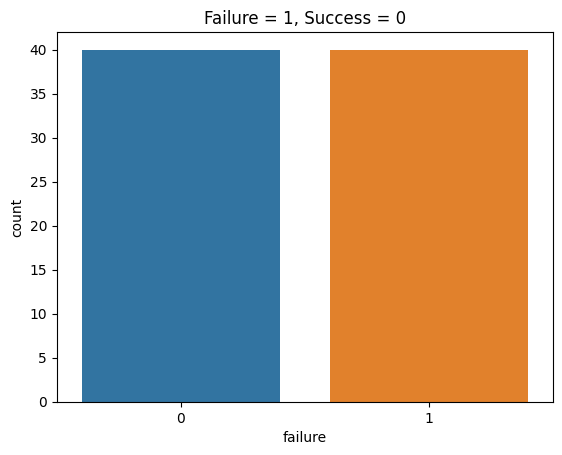

In [16]:
sns.countplot(x=y1).set_title("Failure = 1, Success = 0")

# 4. Binary Classification (Test)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from numpy import mean

In [41]:
model = DecisionTreeClassifier()

In [42]:
cv = RepeatedStratifiedKFold(n_splits = 8, n_repeats=3, random_state=1)
scores = cross_val_score(model, X1, y1, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.938


The correct application of oversampling during k-fold cross-validation is to apply the method to the training dataset only, then evaluate the model on the stratified but non-transformed test set.

This can be achieved by defining a Pipeline that first transforms the training dataset with SMOTE then fits the model.

In [43]:
from imblearn.pipeline import Pipeline

# define pipeline
steps = [('over', imblearn.over_sampling.SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

cv = RepeatedStratifiedKFold(n_splits = 8, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, Xtrans, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.896


In [44]:
scores

array([0.9 , 1.  , 1.  , 1.  , 0.5 , 1.  , 0.9 , 0.5 , 0.75, 0.75, 1.  ,
       1.  , 0.9 , 1.  , 1.  , 1.  , 0.9 , 1.  , 1.  , 1.  , 1.  , 0.9 ,
       0.5 , 1.  ])

# 4. Models building and evaluation

In [18]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_validate

In [217]:
# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1':make_scorer(f1_score)}

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [21]:
# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = SVC(kernel='linear',probability=True) #Linear Kernel
dtr_model = DecisionTreeClassifier(random_state=1)
rfc_model = RandomForestClassifier(random_state=1)
gnb_model = GaussianNB()
classifiers = [('Logistic Regression',log_model), ('Support Vector Classifier', svc_model), ('Decision Tree', dtr_model), ('Random Forest', rfc_model), ('Gaussian Naive Bayes', gnb_model)]

In [ ]:
# Run models_evaluation function
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=5, random_state=1)
models_evaluation(Xtrans, y, cv)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE



def imb_pipeline(clf, X, y):

    pipeline = Pipeline([
        ('sampling', SMOTE(random_state=1)),
        ('classification', clf)
    ])

    score= ['roc_auc', 
           'recall',
           'precision',
           'f1',
           'accuracy']

    cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring=score[0], cv=cv, n_jobs=-1)
    print('Mean ROC AUC: %.3f' % mean(scores))

    return mean(scores)

for classifier in classifiers:
    print("Working on {}...".format(classifier[0]))
    clf = imb_pipeline(classifier[1], Xtrans, y) 
    print("Average Scores for {} is {}".format(classifier[0], clf))
    print('-'*50)
    print('\n')

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE



def imb_pipeline(clf, X, y):

    pipeline = Pipeline([
        ('sampling', SMOTE(random_state=1)),
        ('classification', clf)
    ])

    score= ['roc_auc', 
           'recall',
           'precision',
           'f1',
           'accuracy']

    cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring=score[0], cv=cv, n_jobs=-1)
    print('Mean ROC AUC: %.3f' % mean(scores))

    return mean(scores)

for classifier in classifiers:
    print("Working on {}...".format(classifier[0]))
    clf = imb_pipeline(classifier[1], Xtrans, y) 
    print("Average Scores for {} is {}".format(classifier[0], clf))
    print('-'*50)
    print('\n')

## Stratified K-Fold

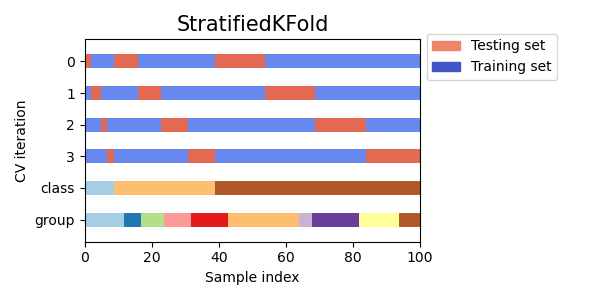

In [218]:
def imb_pipeline(clf, X, y, cv, scoring):

    pipeline = Pipeline([
        ('sampling', SMOTE(random_state=1)),
        ('classification', clf)
    ])


    skf = StratifiedKFold(n_splits = cv, random_state=1, shuffle=True)
    scores = cross_validate(pipeline, X, y, scoring=scoring, cv=skf, n_jobs=-1)
    #print(scores)
    #print('Mean ROC AUC: %.3f' % mean(scores['test_roc_auc']))

    return scores

In [227]:
imb_models_evaluation(Xtrans, y, 5, scoring)

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Best Score
Accuracy,0.860000,0.940000,0.920000,0.940000,0.580000,Support Vector Classifier
Precision,0.500000,0.733333,0.733333,0.800000,0.202381,Random Forest
Recall,0.600000,0.800000,0.700000,0.700000,0.500000,Support Vector Classifier
F1 Score,0.533333,0.760000,0.693333,0.733333,0.280000,Support Vector Classifier


## Repeated Stratified K-Fold

In [160]:
def imb_pipeline(clf, X, y, cv, scoring):

    pipeline = Pipeline([
        ('sampling', SMOTE(random_state=1)),
        ('classification', clf)
    ])

    #score= ['roc_auc', 
    #       'recall',
    #       'precision',
    #       'f1',
    #       'accuracy']

    skf = RepeatedStratifiedKFold(n_splits = cv, n_repeats=3, random_state=1)
    scores = cross_validate(pipeline, X, y, scoring=scoring, cv=skf, n_jobs=-1)
    #print(scores)
    print('Mean ROC AUC: %.3f' % mean(scores['test_roc_auc']))

    return scores

In [221]:
def imb_models_evaluation(X, y, cv, scoring):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''

    # Perform cross-validation to each machine learning classifier
    log = imb_pipeline(log_model, X, y, cv, scoring)
    svc = imb_pipeline(svc_model, X, y, cv, scoring)
    dtr = imb_pipeline(dtr_model, X, y, cv, scoring)
    rfc = imb_pipeline(rfc_model, X, y, cv, scoring)
    gnb = imb_pipeline(gnb_model, X, y, cv, scoring)

    # Create a data frame with the models performance metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)

In [130]:
imb_models_evaluation(Xtrans, y, 5, scoring)

Mean ROC AUC: 0.767
Mean ROC AUC: 0.875
Mean ROC AUC: 0.867
Mean ROC AUC: 0.838
Mean ROC AUC: 0.600


,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Best Score
Accuracy,0.846667,0.920000,0.926667,0.920000,0.640000,Decision Tree
Precision,0.560000,0.816667,0.844444,0.811111,0.385979,Decision Tree
Recall,0.633333,0.800000,0.766667,0.700000,0.533333,Support Vector Classifier
F1 Score,0.564762,0.782222,0.768889,0.731111,0.387359,Support Vector Classifier
ROC AUC,0.766667,0.875000,0.866667,0.837500,0.600000,Support Vector Classifier


ROC AUC = Compute Area Under the Receiver Operating Characteristic Curve (AUROC) from prediction scores. [Doc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) [Doc2](https://scikit-learn.org/stable/modules/model_evaluation.html#roc-auc-binary)

After the support vector classifier has been identified as the most reliable machine learning classifier, the next step would consist in `tuning its parameters` to determine if its performance can further be improved.

It is worth specifying that during the instantiation of the machine learning classifiers in the code above, their parameters were set to the default ones, except for the max_iter parameter in the logistic regression model to achieve model convergence and the dual parameter in the support vector classifier since the number of samples is larger than the number of features.

AUC is not always area under the curve of a ROC curve. Area Under the Curve is an (abstract) area under some curve, so it is a more general thing than AUROC. [Ref](https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc)

# 4.1 Plotting ROC Curve

The ROC Graph summarises all of the confusion matrices that each threshold (to classify as success/failure) produced.

ROC curves make it easy to identify the best threshold for making a decision.

[Link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay)

In [246]:
from sklearn.metrics import RocCurveDisplay, auc

def plot_roc_curve(clf, X, y):

    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []
    roc_auc_scores = []

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(6, 6))

    for fold, (train, test) in enumerate(cv.split(X, y)):
        smote = SMOTE(random_state=1)
        X_oversampled, y_oversampled = smote.fit_resample(X[train], y[train])
        
        clf.fit(X_oversampled, y_oversampled)
        y_pred = clf.predict(X[test])
        y_proba = clf.predict_proba(X[test])
        #print(y_proba)

        acc_scores.append(accuracy_score(y[test], y_pred))
        prec_scores.append(precision_score(y[test], y_pred))
        rec_scores.append(recall_score(y[test], y_pred))
        f1_scores.append(f1_score(y[test], y_pred))
        # ROC curve needs predicted probabilities
        roc_auc_scores.append(roc_auc_score(y[test], y_proba[:,1]))

        viz = RocCurveDisplay.from_estimator(
            clf,
            X[test],
            y[test],
            name=f"ROC fold {fold+1}",
            alpha=0.4,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
    
    """     
    print('Accuracy: ', np.mean(acc_scores))
    print('Precision: ', np.mean(prec_scores))
    print('Recall: ', np.mean(rec_scores))
    print('F1: ', np.mean(f1_scores))
    print('ROC AUC: ', np.mean(roc_auc_scores))  
    """

    ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=f"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"{type(clf).__name__}\nMean ROC curve with variability",
    )
    ax.axis("square")
    ax.legend(loc="lower right")
    plt.show()
    return pd.DataFrame({type(clf).__name__: [np.mean(acc_scores), np.mean(prec_scores), np.mean(rec_scores), np.mean(f1_scores), np.mean(roc_auc_scores)]}, 
        index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

In [247]:
def metrics_table(classifiers):
    scores_df = pd.DataFrame()
    for clf in classifiers:
        scores_df[clf[0]] = plot_roc_curve(clf[1], Xtrans, y)
    scores_df['Best Score'] = scores_df.idxmax(axis=1)
    return(scores_df)

c:\Users\zirb\Documents\Python\Dental_implant\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


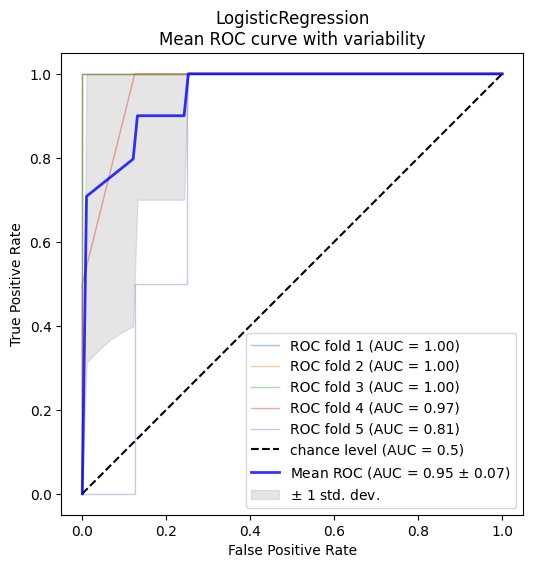

c:\Users\zirb\Documents\Python\Dental_implant\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


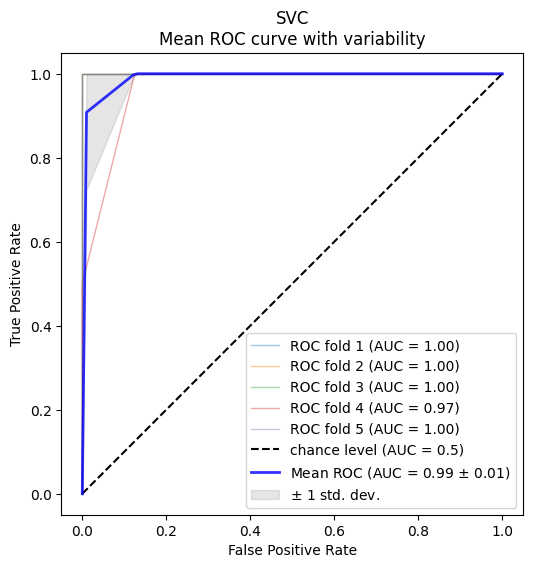

c:\Users\zirb\Documents\Python\Dental_implant\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


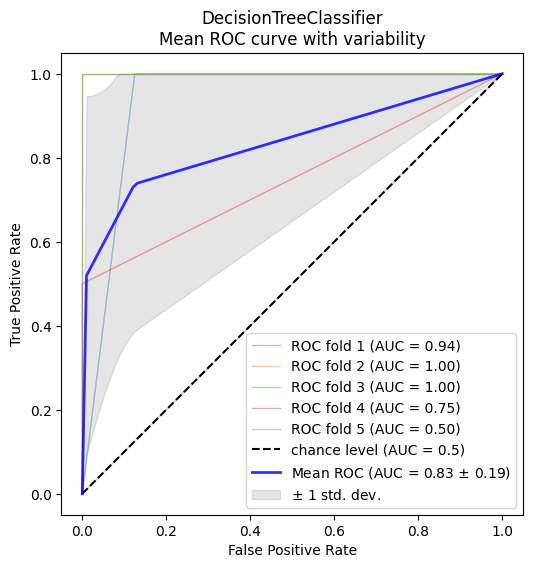

c:\Users\zirb\Documents\Python\Dental_implant\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


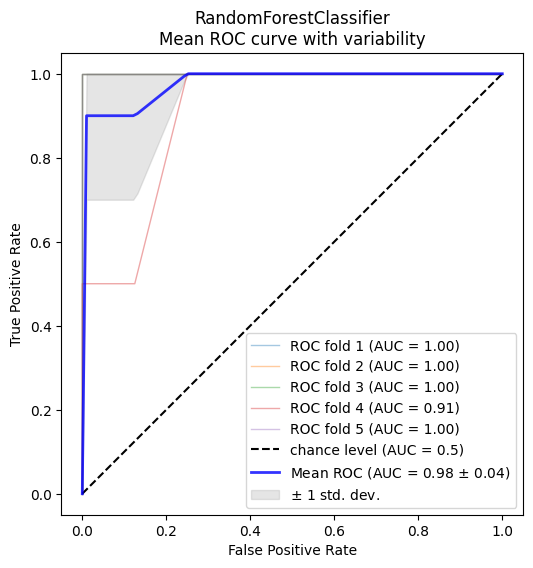

c:\Users\zirb\Documents\Python\Dental_implant\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


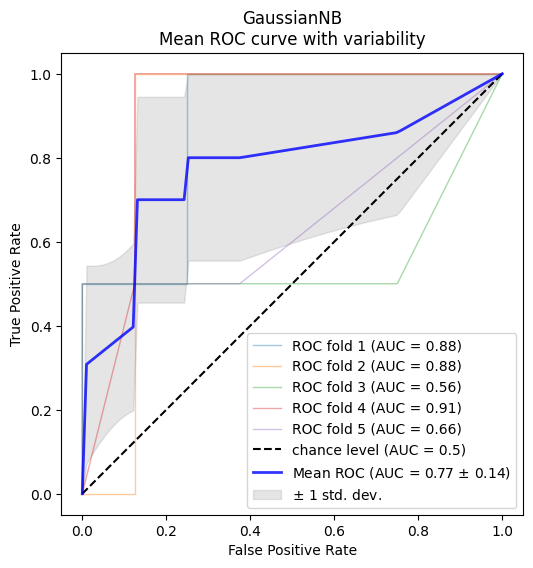

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Best Score
Accuracy,0.860000,0.940000,0.920000,0.940000,0.580000,Support Vector Classifier
Precision,0.500000,0.733333,0.733333,0.800000,0.202381,Random Forest
Recall,0.600000,0.800000,0.700000,0.700000,0.500000,Support Vector Classifier
F1 Score,0.533333,0.760000,0.693333,0.733333,0.280000,Support Vector Classifier
ROC AUC,0.956250,0.993750,0.837500,0.981250,0.775000,Support Vector Classifier


In [248]:
metrics_table(classifiers)

# 5. Plotting ROC curve of Decision Tree and SVC with all data

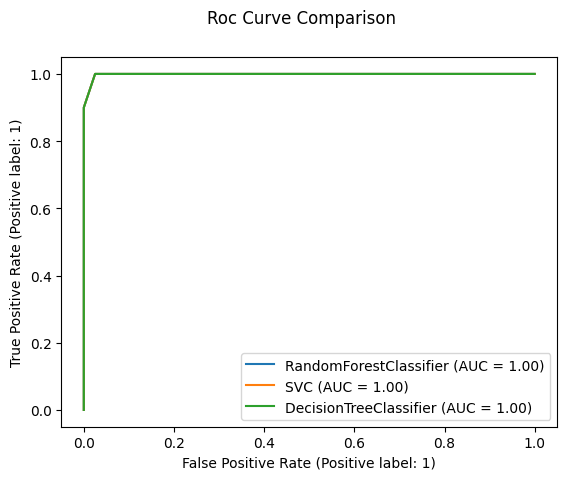

In [45]:
from sklearn.metrics import RocCurveDisplay

#fit a model
svc_model_f = svc_model
svc_model_f.fit(Xtrans, y)

dtr_model_f = dtr_model
dtr_model_f.fit(Xtrans, y)

rfc_model_f = rfc_model
rfc_model_f.fit(Xtrans, y)

gnb_model_f = gnb_model
gnb_model_f.fit(Xtrans, y)

log_model_f = log_model
log_model_f.fit(Xtrans, y)

# Create a ROC Curve display from an estimator.
rfc_disp = RocCurveDisplay.from_estimator(rfc_model_f, Xtrans, y)
svc_disp = RocCurveDisplay.from_estimator(svc_model_f, Xtrans, y, ax=rfc_disp.ax_)
dtr_disp = RocCurveDisplay.from_estimator(dtr_model_f, Xtrans, y, ax=svc_disp.ax_)
dtr_disp.figure_.suptitle("Roc Curve Comparison")
plt.show()

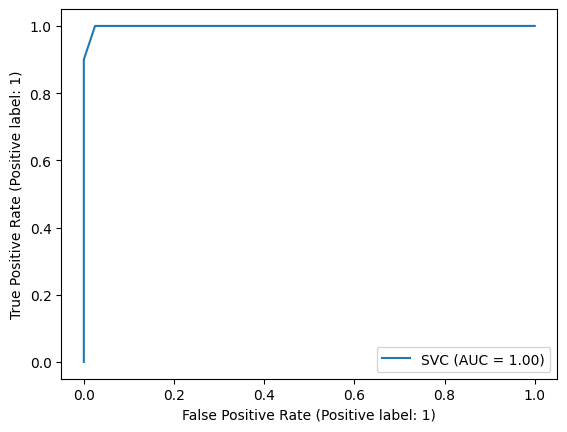

In [23]:
svc_disp = RocCurveDisplay.from_estimator(svc_model_f, Xtrans, y)
plt.show()

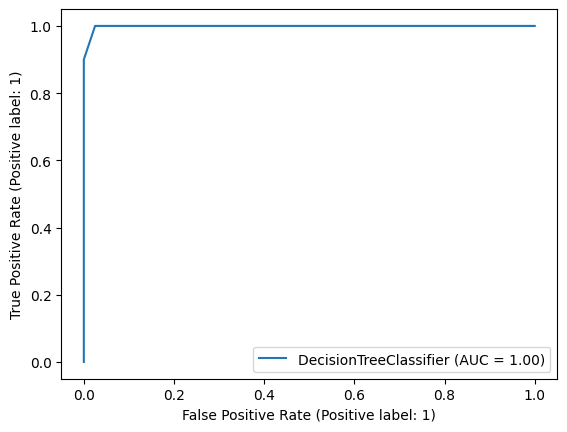

In [146]:
RocCurveDisplay.from_estimator(dtr_model_f, Xtrans, y)
plt.show()

In [37]:
len(Xtrans)

50

[Text(0.5, 0.9, 'x[16] <= 1.5\ngini = 0.32\nsamples = 50\nvalue = [40, 10]'),
 Text(0.3, 0.7, 'x[4] <= 2.0\ngini = 0.153\nsamples = 36\nvalue = [33, 3]'),
 Text(0.2, 0.5, 'x[11] <= 0.5\ngini = 0.111\nsamples = 34\nvalue = [32, 2]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.3, 0.3, 'x[7] <= 1.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4, 0.5, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.7, 'x[7] <= 1.5\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8, 0.5, 'x[10] <= 1.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.7, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]')]

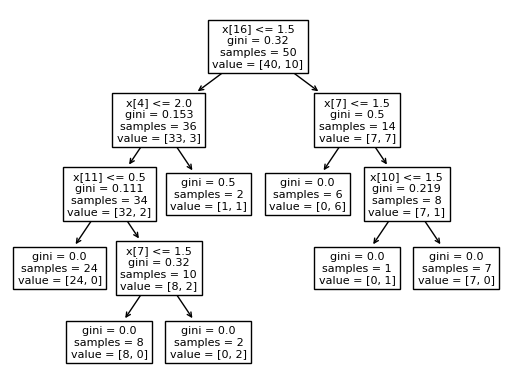

In [25]:
from sklearn import tree
tree.plot_tree(dtr_model_f)

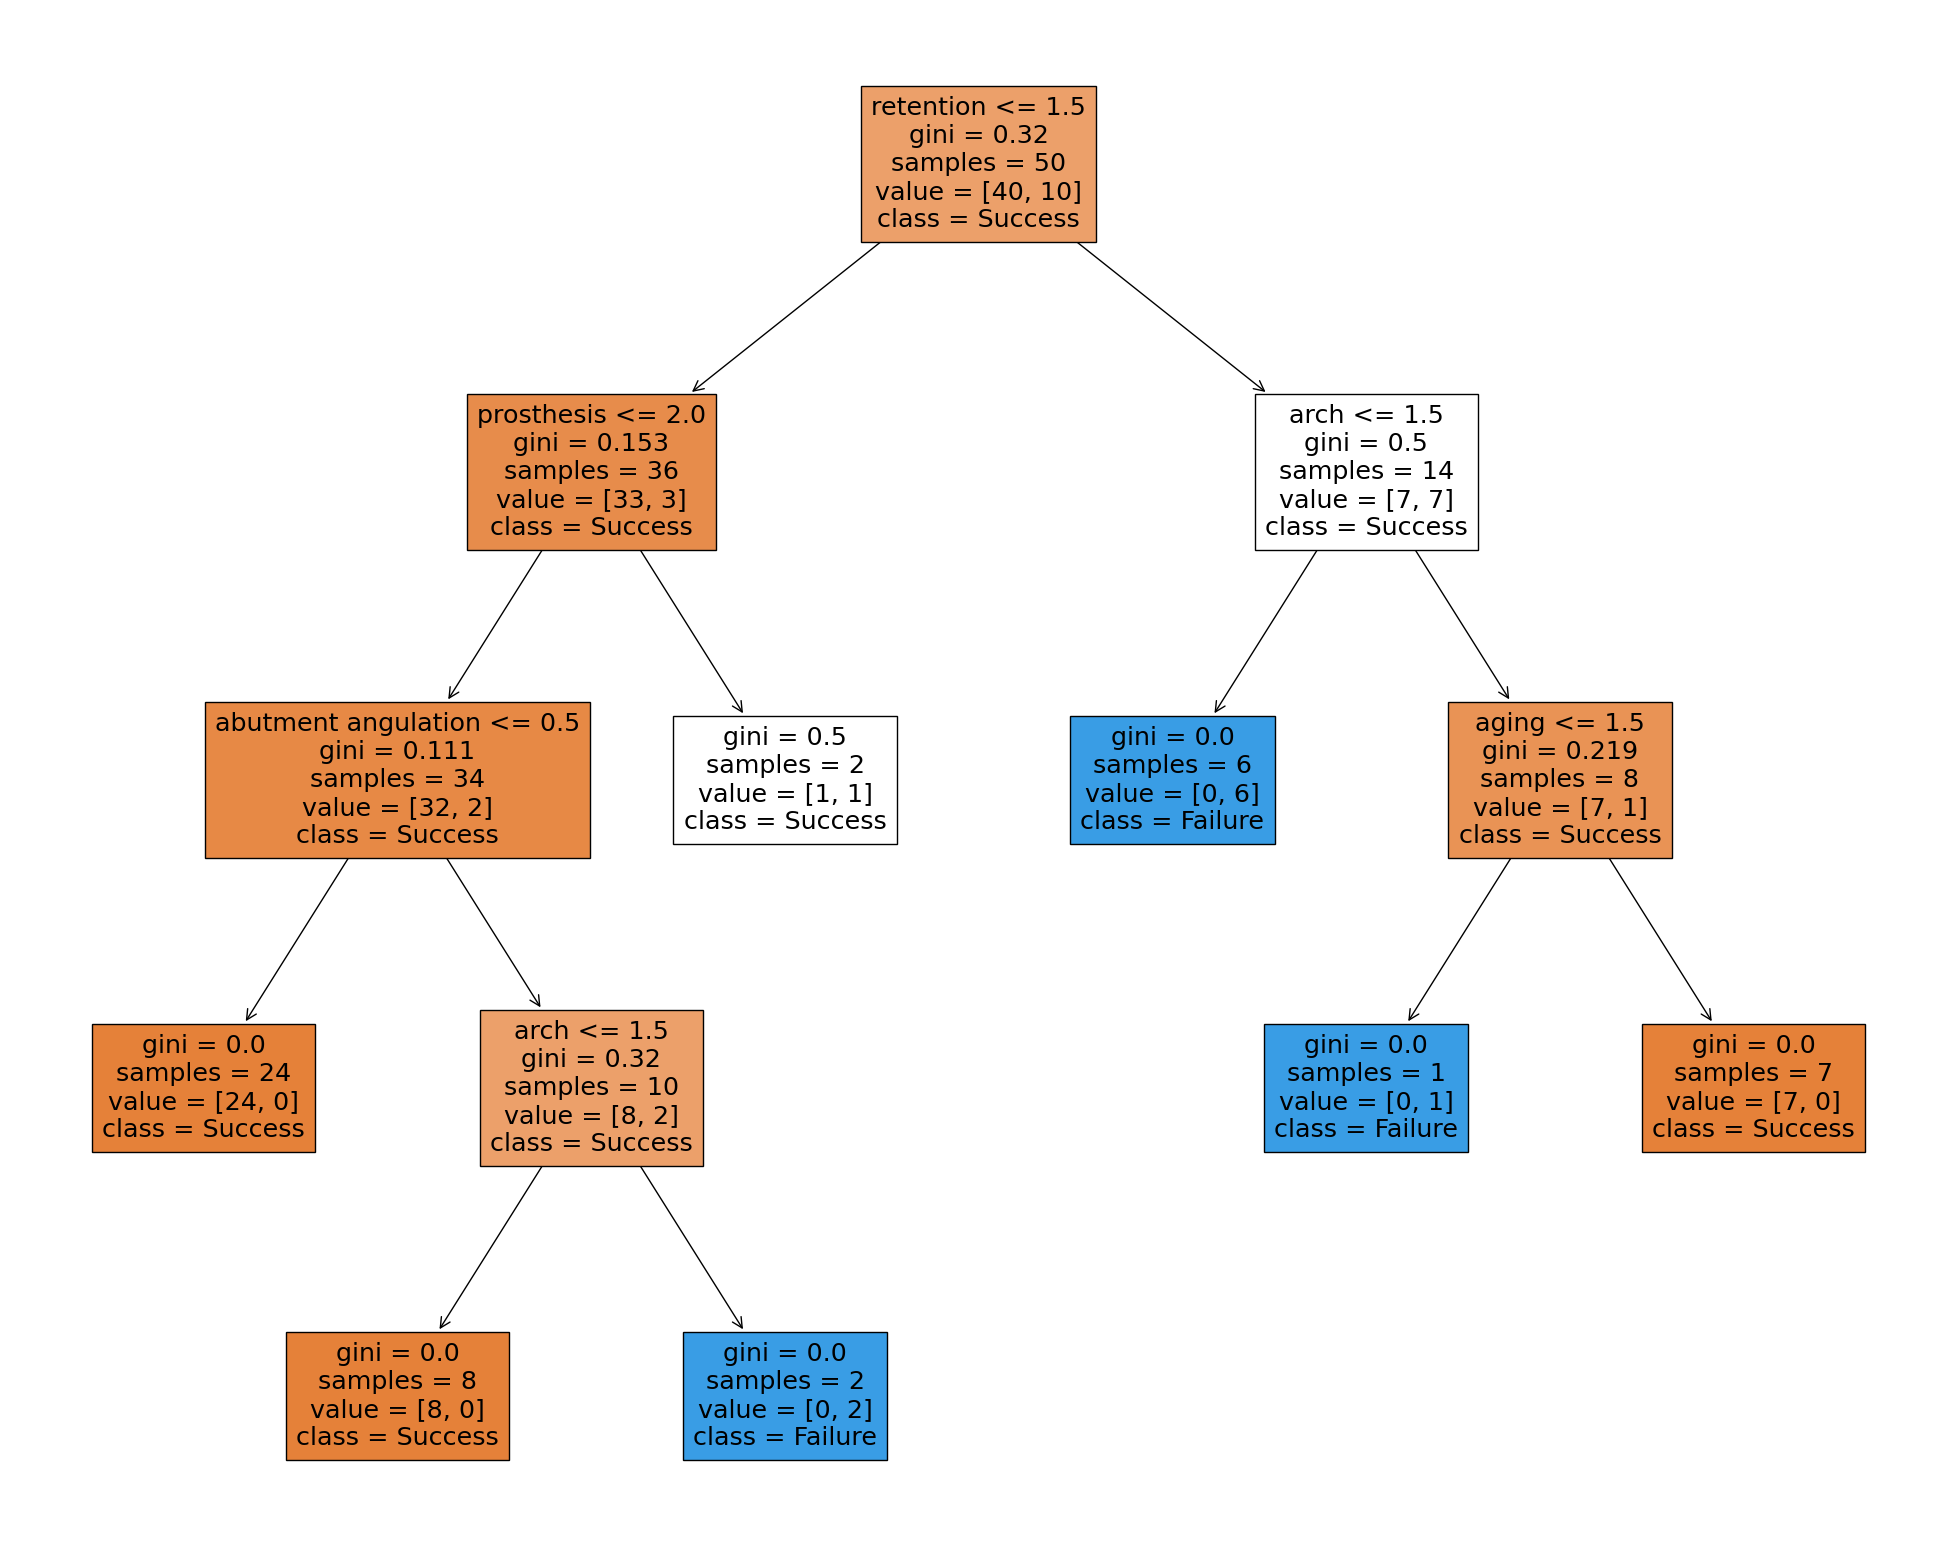

In [40]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr_model_f,
                   feature_names=X.columns,class_names=['Success','Failure'], filled=True)

# 6. Confusion Matrix of Random Forest and SVC

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_conf_matrix(clf):
    class_names = ['Success', 'Failure']
    # Plot non-normalized confusion matrix
    titles_options = [
        (f"{type(clf).__name__}\nConfusion matrix, without normalization", None),
        (f"{type(clf).__name__}\nNormalized confusion matrix", "true"),
    ]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            clf,
            Xtrans,
            y,
            display_labels=class_names,
            cmap=plt.cm.Blues,
            normalize=normalize,
        )
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()

#matrix = confusion_matrix(Y_test, predicted)

LinearSVC
Confusion matrix, without normalization
[[40  0]
 [ 1  9]]
LinearSVC
Normalized confusion matrix
[[1.  0. ]
 [0.1 0.9]]


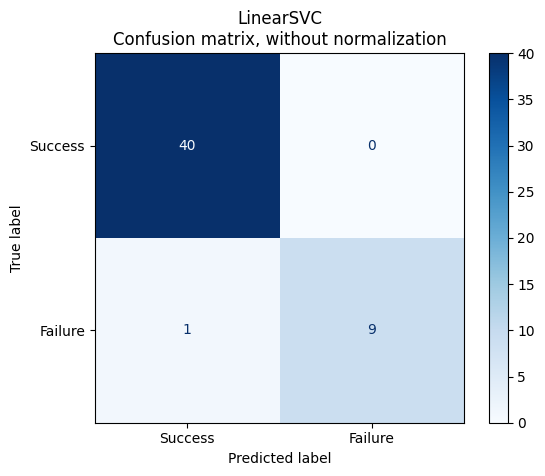

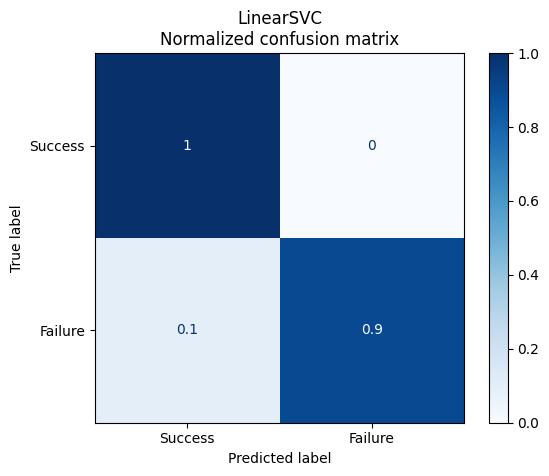

In [158]:
plot_conf_matrix(svc_model_f)

RandomForestClassifier
Confusion matrix, without normalization
[[40  0]
 [ 1  9]]
RandomForestClassifier
Normalized confusion matrix
[[1.  0. ]
 [0.1 0.9]]


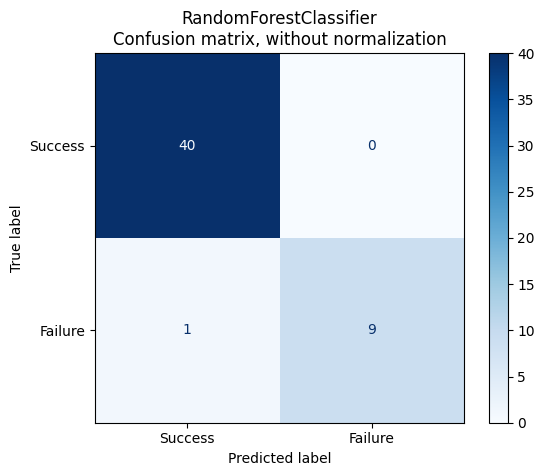

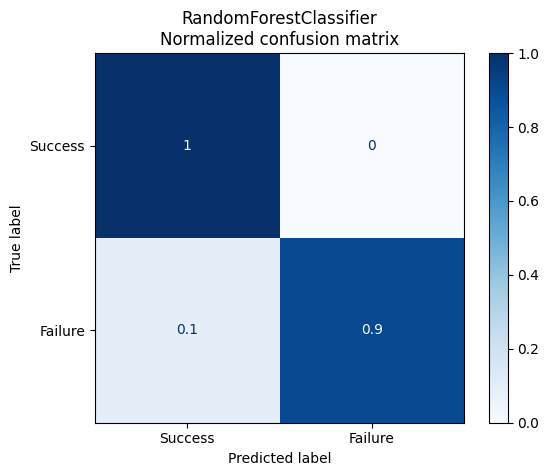

In [43]:
plot_conf_matrix(rfc_model_f)

DecisionTreeClassifier
Confusion matrix, without normalization
[[40  0]
 [ 1  9]]
DecisionTreeClassifier
Normalized confusion matrix
[[1.  0. ]
 [0.1 0.9]]


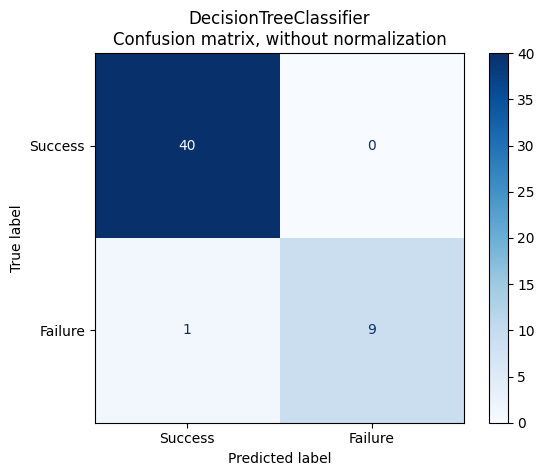

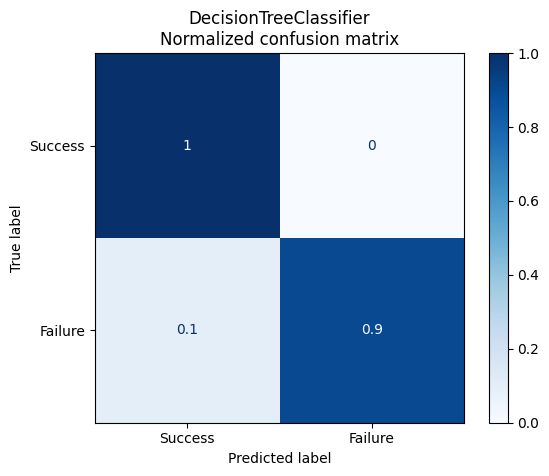

In [44]:
plot_conf_matrix(dtr_model_f)

GaussianNB
Confusion matrix, without normalization
[[39  1]
 [ 4  6]]
GaussianNB
Normalized confusion matrix
[[0.975 0.025]
 [0.4   0.6  ]]


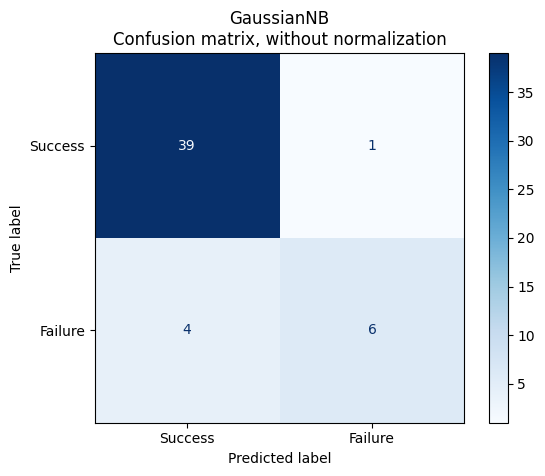

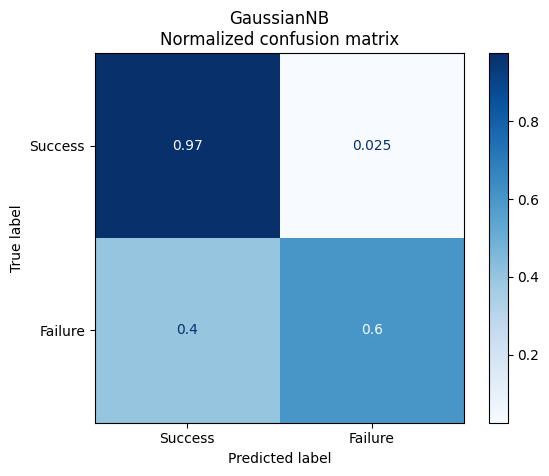

In [46]:
plot_conf_matrix(gnb_model_f)

LogisticRegression
Confusion matrix, without normalization
[[40  0]
 [ 4  6]]
LogisticRegression
Normalized confusion matrix
[[1.  0. ]
 [0.4 0.6]]


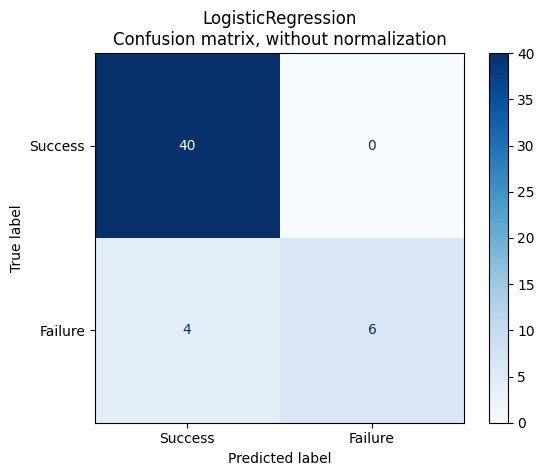

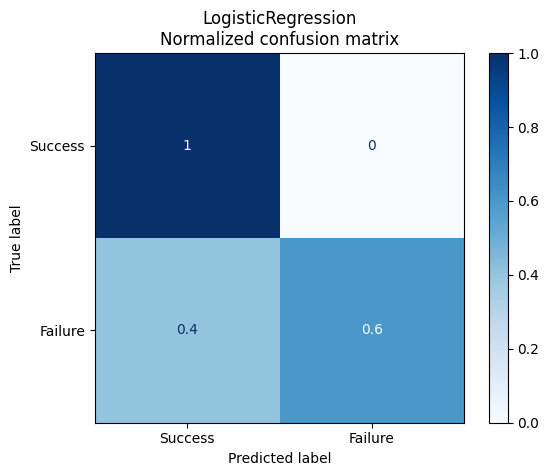

In [47]:
plot_conf_matrix(log_model_f)

In [151]:
type(svc_model_f).__name__

'LinearSVC'

# 7. References

Imbalanced Class Data
* [Techniques to deal with class imbalance](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)
* [Handling Imbalanced Data with Imbalance-Learn](https://www.analyticsvidhya.com/blog/2022/05/handling-imbalanced-data-with-imbalance-learn-in-python/)

SMOTE

* [SMOTE oversampling for imbalanced classficiation](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

Cross-Validation
* [Scikit-learn CV](https://scikit-learn.org/stable/modules/cross_validation.html)
* [What is AUC & AUROC](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it)

Python

* [Machine Learning Classifiers Comparison with Python](https://towardsdatascience.com/machine-learning-classifiers-comparison-with-python-33149aecdbca)
* [Using Smote with Gridsearchcv in Scikit-learn](https://stackoverflow.com/questions/50245684/using-smote-with-gridsearchcv-in-scikit-learn/50245954)
* [Scikit-learn Scoring Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring)
* [Scikit-learn Classification Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)
* [Plot Confusion Matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
* [How to Use ROC Curves and Precision-Recall Curves for Classification in Python](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)
* [SMOTE & Plotting the ROC curve of K-fold CV](https://stackoverflow.com/questions/57708023/plotting-the-roc-curve-of-k-fold-cross-validation)
* [Plotting the ROC curve of K-fold CV](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html)

Models
* [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
* [Differences between SVC and LinearSVC](https://stackoverflow.com/questions/35076586/when-should-one-use-linearsvc-or-svc)
* [Choosing a model after K-Fold CV?](https://stats.stackexchange.com/questions/52274/how-to-choose-a-predictive-model-after-k-fold-cross-validation)
* [Metrics To Evaluate Machine Learning Algorithms in Python](https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/)
* [Support Vector Machines](https://www.youtube.com/watch?v=efR1C6CvhmE&t=1050s)
* [Random Forest](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ)